

**TEMA 1**: INTRODUCCION AL BIG DATA Y ENTORNO SPARK


In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
#All imports
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

In [3]:
!java --version

openjdk 11.0.15 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [6]:
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [8]:
!echo $SPARK_HOME

/content/spark-2.4.8-bin-hadoop2.7


In [27]:
import findspark
findspark.init()
from google.colab import files
from pyspark import SparkContext, SparkConf,SQLContext,HiveContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, lit
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [28]:
# create SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

In [29]:
spark.version

'2.4.8'

In [30]:
sc = spark.sparkContext


In [31]:
sc.version

'2.4.8'

In [32]:
sqlContext = SQLContext(sc)

## Introduction

Apache Spark is a fast and powerful framework that provides an API to perform massive distributed processing over resilient sets of data. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is the fundamental and backbone data type of this engine. Spark SQL is Apache Spark's module for working with structured data and MLlib is Apache Spark's scalable machine learning library. Apache Spark is written in Scala programming language. To support Python with Spark, Apache Spark community released a tool, PySpark. PySpark has similar computation speed and power as Scala. PySpark is a parallel and distributed engine for running big data applications. Using PySpark, you can work with RDDs in Python programming language. 

This tutorial discusses Big Data via PySpark, a Python package for spark programming. Spark's high level libraries such as SparkSQL, Mllib will be used to interact with two different datasets.

## What is SparkContext?

Spark comes with interactive python shell in which PySpark is already installed in it. PySpark automatically creates a SparkContext for you in the PySpark Shell. SparkContext is an entry point into the world of Spark. An entry point is a way of connecting to Spark cluster. We can use SparkContext using **sc** variable. In the following examples, we retrieve SparkContext version and Python version of SparkContext.

In [38]:
# to retrieve SparkContext version
sc.version

'2.4.8'

In [39]:
# to retriece Python version of SparkContext
sc.pythonVer

'3.7'

## Import Packages

**TEMA 2** MANEJO DE DATOS EN SPARK

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from math import sqrt
from pyspark.mllib.clustering import KMeans

## Using map and filter methods with Lambda function in Python

Lambda functions are anonymous functions in Python. Anonymous functions do not bind to any name in runtime and it returns the functions without any name. They are usually used with map and filter methods. Lambda functions create functions to be called later. In the following example, we use lambda function with map and flter methods.

In [41]:
my_list = [1,2,3,4,5]
squared_my_list = list(map(lambda x: x*x, my_list))
squared_my_list

[1, 4, 9, 16, 25]

In [42]:
filtered_my_list = list(filter(lambda x: (x%2 != 0), my_list))
filtered_my_list

[1, 3, 5]

## Creating RDD from Object

RDDs are data stacks distributed throughout cluster of computers. Each stack is calculated on different computers in the cluster. RDDs are the most basic data structure of Spark. We can create RDD by giving existing object like Python list to SparkContext's parallelize method. In the following example, we create a list with numbers, then we create a RDD from this list.

In [84]:
numbers = list(range(1,5))
print(numbers)

[1, 2, 3, 4]


In [74]:
# load the numbers into PySpark
numbersRDD = sc.parallelize(numbers)

In [75]:
print(type(numbersRDD))
print(type(numbers))

<class 'pyspark.rdd.RDD'>
<class 'list'>


In [76]:
numbersRDD.getNumPartitions()

2

In [77]:
print(sc.defaultParallelism)

2


## Transformations and Actions on RDD

Transformations and actions are two type of operations in Spark. Transformations create new RDDs. Actions performs computation on the RDDs. Map, filter, flatmap and union are basic RDD transformations. Collect, take, first and count are basic RDD actions. In the following example, we create rdd named numRDD from list and then using map transformation we create a new rdd named cubeRDD from numRDD. Finally, we use collect action to return a list that contains all of the elements in this RDD.

In [88]:
#Create RDD, map() transformations
numRDD = sc.parallelize(numbers)
cubeRDD = numRDD.map(lambda x: x**3)
numbers_all = cubeRDD.collect()

[print(num) for num in numbers_all];

1
8
27
64


In [89]:
#take shows the first n values
numRDD.take(5)

[1, 2, 3, 4]

In [93]:
#reduce :  reduces de values using a conmutative and associative binary operator
from operator import add, mul, sub
#numRDD.reduce(add)
#numRDD.reduce(mul)

In [94]:
numRDD.stats()

(count: 4, mean: 2.5, stdev: 1.118033988749895, max: 4.0, min: 1.0)

In [95]:
numRDD.count()

4

## Transformations and Actions on pair RDD

Pair RDD is a special type of RDD to work with datasets with key/value pairs. All regular transformations work on pair RDD. In the following example, we create pair RDD with 4 tuple with two numbers. In each tuple, the first number is key and the second number is value. Then, we apply reduceByKey transformation to pair RDD. ReduceByKey tranformation combine values with the same key. Therefore, this transformation adds the values of tuples with the same key.

In [96]:
# create pairRdd with key and value pairs
pairRdd = sc.parallelize([(1,2), (3,4), (3,6), (3,7), (4,5)])

[print(num) for num in pairRdd.collect()];

print("\n")

pairRdd_Reduced = pairRdd.reduceByKey(lambda x, y: x-y)

[print(num) for num in pairRdd_Reduced.collect()];

(1, 2)
(3, 4)
(3, 6)
(3, 7)
(4, 5)


(4, 5)
(1, 2)
(3, 5)


In [97]:
pairRdd.take(2)

[(1, 2), (3, 4)]

We can sort keys of tuples using sortByKey transformation like in the following example.

In [98]:
pairRdd_Reduced_Sort = pairRdd_Reduced.sortByKey(ascending=True)

[print(num) for num in pairRdd_Reduced_Sort.collect()];

(1, 2)
(3, 5)
(4, 5)


In [99]:
pairRdd.take(3)

[(1, 2), (3, 4), (3, 6)]

We can count number of tuples with the same key. In the following example, we see (3,2) because there are two tuple with key 3 in pairRdd.

In [100]:
total = pairRdd.countByKey()

In [101]:
total.items()

dict_items([(1, 1), (3, 3), (4, 1)])

In [102]:
[print("key", k, "has", v, "counts") for k,v in total.items()];

key 1 has 1 counts
key 3 has 3 counts
key 4 has 1 counts


## What is SparkSession?

**SparkContext** is the main entry point for creating RDDs while SparkSession provides a single point of entry to interact with Spark Dataframes. **SparkSession** is used to create DataFrame, register DataFrames, execute SQL queries. We can access SparkSession in PySpark using spark variable.
In the following examples, we retrieve SparkSession version and other informations about it.

In [104]:
spark

## Creating PySpark DataFrame from RDD

Spark SQL which is a Spark module for structured data processing provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. In the following example, we create rdd from list then we create PySpark dataframe using SparkSession's createDataFrame method. When we look at the type of dataframe, we can see pyspark.sql.dataframe as an output. Furthermore, we can use show method to print out the dataframe.

In [106]:
# Create a PySpark Dataframe from rdd
sample_list = [("Mona", 23), ("Lisa", 29), ('Leonardo',37), ('Piero',41)]
rdd = sc.parallelize(sample_list)
df_names = spark.createDataFrame(rdd, schema=['Name', 'Age'])
type(df_names)

pyspark.sql.dataframe.DataFrame

In [107]:
df_names.show()

+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 23|
|    Lisa| 29|
|Leonardo| 37|
|   Piero| 41|
+--------+---+



In [108]:
columns=["New Name","New Age"]
SDF=rdd.toDF(columns)
SDF.show()
type(SDF)

+--------+-------+
|New Name|New Age|
+--------+-------+
|    Mona|     23|
|    Lisa|     29|
|Leonardo|     37|
|   Piero|     41|
+--------+-------+



pyspark.sql.dataframe.DataFrame

In [109]:
df_names.rdd.take(5)

[Row(Name='Mona', Age=23),
 Row(Name='Lisa', Age=29),
 Row(Name='Leonardo', Age=37),
 Row(Name='Piero', Age=41)]

In [110]:
df_names.rdd.getNumPartitions()

2

## Add Datasets

In [116]:
path_people="/content/people.csv"

In [117]:
df_data_1 = spark.read.csv(path_people,header=True,inferSchema=True)
df_data_1.show(10)

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows



In [115]:
df_data_1.show(5)

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



In [ ]:
df_data_1.rdd.take(5)

[Row(_c0=0, person_id=100, name='Penelope Lewis', sex='female', date of birth='1990-08-31'),
 Row(_c0=1, person_id=101, name='David Anthony', sex='male', date of birth='1971-10-14'),
 Row(_c0=2, person_id=102, name='Ida Shipp', sex='female', date of birth='1962-05-24'),
 Row(_c0=3, person_id=103, name='Joanna Moore', sex='female', date of birth='2017-03-10'),
 Row(_c0=4, person_id=104, name='Lisandra Ortiz', sex='female', date of birth='2020-08-05')]

In [118]:
df_data_1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)



You can also add 5000_points.txt dataset by applying same procedure but click insert to code then click insert credentials then write "file" and "bucket" values inside "path_5000 = cos.url('file_name', 'bucket_name')" expression and comment out path_5000.

In [120]:
path_5000 = "/content/5000_points.txt"
#df_people = spark.sparkContext.textFile(path_5000)

## Create PySpark DataFrame from external file

We can create PySpark DataFrame by using SparkSession's read.csv method. To do this, we should give path of csv file as an argument to the method. Show action prints first 20 rows of DataFrame. Count action prints number of rows in DataFrame. Columns attribute prints the list of columns in DataFrame. PrintSchema action prints the types of columns in the Dataframe and it gives information about whether there is null values in columns or not.

In [126]:
df_people = spark.read.csv(path_people, header=True, inferSchema=True)

In [127]:
df_people.show(10)

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows



In [128]:
df_people.count()

100000

In [129]:
print(len(df_people.columns))

5


In [130]:
df_people.columns

['_c0', 'person_id', 'name', 'sex', 'date of birth']

In [131]:
df_people.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)



In [132]:
df_people.drop("name","date of birth").printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- sex: string (nullable = true)



We can use select method to select some columns of DataFrame. If we give argument to show method, it prints out rows as number of argument. In the following example it prints out 10 rows. dropDuplicates method removes the duplicate rows of a DataFrame. We can use count action to see how many rows are dropped.

In [133]:
df_people_sub = df_people.select('name', "sex", 'date of birth')

In [134]:
df_people_sub.show(10)

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows



In [135]:
df_people_sub_nodup = df_people_sub.dropDuplicates()

In [136]:
print("Before removing duplicates:", df_people_sub.count())
print("After removing dublicates:", df_people_sub_nodup.count())

Before removing duplicates: 100000
After removing dublicates: 99998


We can filter out the rows based on a condition by using filter transformation as in the following example.

In [137]:
df_people_female = df_people.filter(df_people.sex == "female")
df_people_male = df_people.filter(df_people.sex == "male")

In [138]:
df_people_female.count()

49014

In [139]:
df_people_female.show(5)

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
+---+---------+-----------------+------+-------------+
only showing top 5 rows



We can group columns based on their values by using groupby transformation as in the following example.

In [140]:
df_people_sex = df_people.groupby("sex")
df_people_sex.count().show()

+------+-----+
|   sex|count|
+------+-----+
|  null| 1920|
|female|49014|
|  male|49066|
+------+-----+



We can sorts the DataFrame based on one or more columns by using orderBy transformation.

In [141]:
df_people.orderBy("date of birth").show(3)

+-----+---------+---------------+------+-------------+
|  _c0|person_id|           name|   sex|date of birth|
+-----+---------+---------------+------+-------------+
|57359|    57459|   Sharon Perez|female|   1899-08-28|
|62233|    62333|Martina Morison|female|   1901-04-21|
|96318|    96418|   Lisa Garrett|female|   1901-05-09|
+-----+---------+---------------+------+-------------+
only showing top 3 rows



We can rename a column in DataFrame by using withColumnRenamed transformation.

In [142]:
df_people = df_people.withColumnRenamed("date of birth", "birth")
df_people.show(3)

+---+---------+--------------+------+----------+
|_c0|person_id|          name|   sex|     birth|
+---+---------+--------------+------+----------+
|  0|      100|Penelope Lewis|female|1990-08-31|
|  1|      101| David Anthony|  male|1971-10-14|
|  2|      102|     Ida Shipp|female|1962-05-24|
+---+---------+--------------+------+----------+
only showing top 3 rows



## Using SQL queries with DataFrames by using Spark SQL module

We can also use SQL queries to achieve the same things with DataFrames. Firstly, we should create temporary table by using createOrReplaceTempView method. We should give the name of temporary table as an argument to the method. Then, we can give any query we want to execute to SparkSession's sql method as an argument. Look at the following example.

In [148]:
path_people="/content/people.csv"
df_people = spark.read.csv(path_people, header=True, inferSchema=True)
df_people = df_people.withColumnRenamed("date of birth", "birth")
df_people.createOrReplaceTempView("people")

In [149]:
query='DESCRIBE people'
spark.sql(query).show(10)

+---------+---------+-------+
| col_name|data_type|comment|
+---------+---------+-------+
|      _c0|      int|   null|
|person_id|      int|   null|
|     name|   string|   null|
|      sex|   string|   null|
|    birth|   string|   null|
+---------+---------+-------+



In [150]:
query="""SELECT name, birth FROM people WHERE sex=="male" ORDER BY `birth`"""

df_people_names = spark.sql(query)
df_people_names.show(10)

+---------------+----------+
|           name|     birth|
+---------------+----------+
|   Tyler Walton|1903-07-14|
|  Daniel Naiman|1903-11-07|
|   John Merritt|1906-11-04|
|   Roger Watkin|1907-12-08|
|     Tim Makris|1909-07-11|
|    Jeremy Jost|1910-04-14|
|  Fredrick Nass|1911-01-12|
|     Shaun King|1911-03-27|
|Mitchell Martin|1911-07-06|
|   Daniel Rutan|1911-08-09|
+---------------+----------+
only showing top 10 rows



In [151]:
query='SELECT name, `birth` FROM people WHERE `birth` BETWEEN "1903-01-01" AND "1911-12-31" ORDER BY `birth`'

df_people_1903_1906 = spark.sql(query)
df_people_1903_1906.show(10)

+---------------+----------+
|           name|     birth|
+---------------+----------+
|   Tyler Walton|1903-07-14|
|  Daniel Naiman|1903-11-07|
| Christy Dawson|1904-01-11|
|   John Merritt|1906-11-04|
|   Roger Watkin|1907-12-08|
|   Marie Givens|1908-02-15|
|Maribel Donahoe|1908-11-27|
|    Paula Evans|1909-02-10|
|     Tim Makris|1909-07-11|
|   Joyce Jacoby|1909-09-13|
+---------------+----------+
only showing top 10 rows



In [152]:
query='SELECT sex,COUNT(sex) FROM people WHERE birth BETWEEN "1903-01-01" AND "1911-12-31" GROUP BY sex'
df_people_1903_1906_sex = spark.sql(query)
df_people_1903_1906_sex.show()

+------+----------+
|   sex|count(sex)|
+------+----------+
|female|         7|
|  male|        10|
+------+----------+



## Create RDD from external file

The second and mostly used way to create RDD is from external dataset. To do this, we can use SparkContext's textFile method. In the following example, we use 5000_points.txt dataset. To do this, we use path to dataset as an argument to textFile method.

In [153]:
# load the 5000_points dataset into a rdd named clusterRDD
clusterRDD = sc.textFile(path_5000)
#NOT clusterRDD.show(10)
clusterRDD.take(10)

['664159\t550946',
 '665845\t557965',
 '597173\t575538',
 '618600\t551446',
 '635690\t608046',
 '588100\t557588',
 '582015\t546191',
 '604678\t574577',
 '572029\t518313',
 '604737\t574591']

Default number of partition of rdd is two. We can see that using getNumPartitions method. If we want to increase number of partition, we can give minPartitions argument to textFile method.

In [154]:
clusterRDD.getNumPartitions()

2

In [155]:
clusterRDD = sc.textFile(path_5000,  minPartitions = 5)

In [156]:
clusterRDD.getNumPartitions()

5

In [157]:
clusterRDD.take(5)

['664159\t550946',
 '665845\t557965',
 '597173\t575538',
 '618600\t551446',
 '635690\t608046']

We can transform this rdd by splitting the lines based on the tab.

In [158]:
rdd_split = clusterRDD.map(lambda x: x.split("\t"))

In [159]:
rdd_split.take(5)

[['664159', '550946'],
 ['665845', '557965'],
 ['597173', '575538'],
 ['618600', '551446'],
 ['635690', '608046']]

We can also further transform the splitted RDD to create a list of integers for the two columns.

In [160]:
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

In [161]:
rdd_split_int.take(5)

[[664159, 550946],
 [665845, 557965],
 [597173, 575538],
 [618600, 551446],
 [635690, 608046]]

## Machine Learning with PySpark MLlib

PySpark MLlib is the Apache Spark's scalable machine learning library in Python consisting of common learning algorithms and utilities. We use Kmeans algorithm of MLlib library to cluster data in 5000_points.txt dataset. First, we should define error method to calculate distance from every point to center of its clusters which the points belong to.

In [162]:
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

We train the model with 4 different number of clusters from 13 to 16 and then calculate the error for all of them. As you see in the output, 16 clusters give minimum error. We retrain the model with the number of cluster with the smallest error. We then use clusterCenters attribute to see the center of all clusters.

In [168]:
from math import sqrt
from pyspark.mllib.clustering import KMeans
# Train the model with clusters from 13 to 16 and compute SSE
temp = 0
cluster = 0
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    SSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y) 
    while temp > SSE or temp == 0:
        temp = SSE
        cluster = clst
    print("The cluster", clst, "has Sum of Squared Error", SSE)


print("\ncluster", cluster)
print("SSE:", temp)


# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=cluster, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

The cluster 13 has Sum of Squared Error 247695647.89233023
The cluster 14 has Sum of Squared Error 251668177.0509325
The cluster 15 has Sum of Squared Error 249952708.50382334
The cluster 16 has Sum of Squared Error 168449816.78242967

cluster 16
SSE: 168449816.78242967


We can again use SparkSession's createDataFrame method to create DataFrame from rdd. We must convert PySpark DataFrame to Pandas DataFrame in order to visualise data. To do this, we can use toPandas method. We create another Pandas DataFrame from cluster centers list. Then, using matplotlib's scatter method, we can make plot for clusters and their centers.

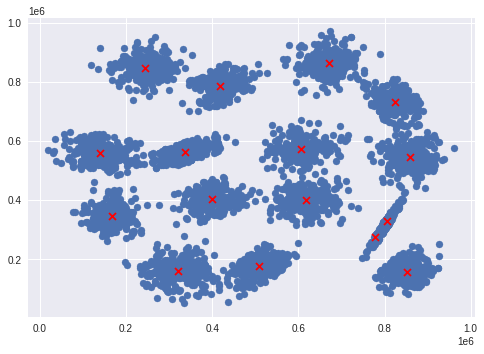

In [169]:
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()

## Conclusion

This tutorial discusses Big Data via PySpark, a Python package for spark programming. In this tutorial, I explained SparkContext, using map and filter methods with Lambda functions in Python, creating rdd from object and external file, transformations and actions on rdd and pair rdd, SparkSession, creating PySpark Dataframe from rdd and external file, using sql queries with Dataframes by using Spark SQL module and finally, machine learning with PySpark MLlib library.

In [165]:
#Converting between Pandas DF, Spark DF and RDD
# load the 5000_points dataset into a rdd named clusterRDD
spRDD = sc.textFile(path_5000)
#NOT clusterRDD.show(10)
spRDD.take(10)
# RDD to Spark DataFrame
spRDD = spRDD.map(lambda x: x.split("\t"))
spRDD = spRDD.map(lambda x: [int(x[0]), int(x[1])])
spRDD.take(10)

#Convert to Spark DF
sparkDF = spRDD.toDF()
sparkDF.show(10)

#Convert to Pandas DF
pdDF = sparkDF.toPandas()
pdDF.head(10)

+------+------+
|    _1|    _2|
+------+------+
|664159|550946|
|665845|557965|
|597173|575538|
|618600|551446|
|635690|608046|
|588100|557588|
|582015|546191|
|604678|574577|
|572029|518313|
|604737|574591|
+------+------+
only showing top 10 rows



,_1,_2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
5,588100,557588
6,582015,546191
7,604678,574577
8,572029,518313
9,604737,574591


In [166]:
#Converting between Pandas DF, Spark DF and RDD
#Converting Pandas DF to Spaek DF
spDF_2 = sqlContext.createDataFrame(pdDF)
spDF_2.show(10)

pdDF.head(10)

#Accesing RDD
spRDD_2=spDF_2.rdd
spRDD_2.take(10)

+------+------+
|    _1|    _2|
+------+------+
|664159|550946|
|665845|557965|
|597173|575538|
|618600|551446|
|635690|608046|
|588100|557588|
|582015|546191|
|604678|574577|
|572029|518313|
|604737|574591|
+------+------+
only showing top 10 rows



[Row(_1=664159, _2=550946),
 Row(_1=665845, _2=557965),
 Row(_1=597173, _2=575538),
 Row(_1=618600, _2=551446),
 Row(_1=635690, _2=608046),
 Row(_1=588100, _2=557588),
 Row(_1=582015, _2=546191),
 Row(_1=604678, _2=574577),
 Row(_1=572029, _2=518313),
 Row(_1=604737, _2=574591)]